<!--Header-->
<div id="header" class="fluid-row" style="max-width: 910px; margin-left: auto; margin-right: auto">
    <div class="row" style="color: #4D4D4D;font-size: 15px;padding-bottom: 20px">
        <div class="col-md-7">
            <img src="http://materials.campus.uoc.edu/cdocent/common/img/logo-uoc.png" alt="Logo UOC" class="img-responsive" style="margin:20px 0px 0px">
        </div>
        <div class="col-md-5">
            <h1 style="margin:15px 0px 0px;font-size: 40px;">Estudios de Informática, Multimedia y Telecomunicaciones</h1>
            <div style="text-align:left;margin-top: 5px;"></div>
        </div>
    </div>
    <div class="row" style="background: #FCB517;padding: 10px 20px;">
        <div class="col-md-6">
            <div style="text-align:center;"> </div>
        </div>
    </div>
</div>
<!--/Header-->

# 75.584 Minería de datos
### PEC 3


Estudiante: Erika Martínez Soria

In [1]:
#Importar las librerias

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import tree
import scipy.stats as stats

In [2]:
# Accedemos al fichero credit.csv
filename = 'credit.csv'

creditData = pd.read_csv(filename)
creditData.head(5)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


# Exploración del conjunto de datos
Verificamos la estructura del juego de datos principal.

Obtenemos el numero de filas y columnas del conjunto de datos.

In [3]:
creditData.shape

(1000, 21)

Vemos que tenemos **21** variables y **1000** registros.

A continuacion, tenemos el número de columnas y sus nombres.

In [4]:
creditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_length     1000 non-null   object
 7   installment_rate      1000 non-null   int64 
 8   personal_status       1000 non-null   object
 9   other_debtors         1000 non-null   object
 10  residence_history     1000 non-null   int64 
 11  property              1000 non-null   object
 12  age                   1000 non-null   int64 
 13  installment_plan      1000 non-null   object
 14  housing               1000 non-null   object
 15  existing_credits      1000 non-null   i

Las variables parecen tener completos los datos para los 1000 registros.

Revisamos la descripción de las variables.

**checking_balance**: (qualitative) Status of existing checking account
+ A11 : ... < 0 DM
+ A12 : 0 <= ... < 200 DM
+ A13 : ... >= 200 DM / salary assignments for at least 1 year
+ A14 : no checking account

**months_loan_duration**: (numerical) Duration in month

**credit_history**: (qualitative) Credit history
+ A30 : no credits taken/ all credits paid back duly
+ A31 : all credits at this bank paid back duly
+ A32 : existing credits paid back duly till now
+ A33 : delay in paying off in the past
+ A34 : critical account/ other credits existing (not at this bank)

**purpose**: (qualitative) Purpose
+ A40 : car (new)
+ A41 : car (used)
+ A42 : furniture/equipment
+ A43 : radio/television
+ A44 : domestic appliances
+ A45 : repairs
+ A46 : education
+ A47 : (vacation - does not exist?)
+ A48 : retraining
+ A49 : business
+ A410 : others

**amount**: (numerical) Credit amount

**savings_balance**: (qualitative) Savings account/bonds
+ A61 : ... < 100 DM
+ A62 : 100 <= ... < 500 DM
+ A63 : 500 <= ... < 1000 DM
+ A64 : .. >= 1000 DM
+ A65 : unknown/ no savings account

**employment_length**: (qualitative) Present employment since
+ A71 : unemployed
+ A72 : ... < 1 year
+ A73 : 1 <= ... < 4 years
+ A74 : 4 <= ... < 7 years
+ A75 : .. >= 7 years

**installment_rate**: (numerical) Installment rate in percentage of disposable income

**personal_status**: (qualitative) Personal status and sex
+ A91 : male : divorced/separated
+ A92 : female : divorced/separated/married
+ A93 : male : single
+ A94 : male : married/widowed
+ A95 : female : single

**other_debtors**: (qualitative) Other debtors / guarantors
+ A101 : none
+ A102 : co-applicant
+ A103 : guarantor

**residence_history**: (numerical) Present residence since

**property**: (qualitative) Property
+ A121 : real estate
+ A122 : if not A121 : building society savings agreement/ life insurance
+ A123 : if not A121/A122 : car or other, not in attribute 6
+ A124 : unknown / no property

**age**: (numerical) Age in years

**installment_plan**: (qualitative) Other installment plans
+ A141 : bank
+ A142 : stores
+ A143 : none

**housing**: (qualitative) Housing
+ A151 : rent
+ A152 : own
+ A153 : for free

**existing_credits**: (numerical) Number of existing credits at this bank

**job**: (qualitative) Job
+ A171 : unemployed/ unskilled - non-resident
+ A172 : unskilled - resident
+ A173 : skilled employee / official
+ A174 : management/ self-employed/ highly qualified employee/ officer

**dependents**: (numerical) Number of people being liable to provide maintenance for

**telephone**: (qualitative) Telephone
+ A191 : none
+ A192 : yes, registered under the customers name

**foreign_worker**: (qualitative) foreign worker
+ A201 : yes
+ A202 : no

**default**: (qualitative) Variable objetivo
+ 1 = "No default"
+ 2 = "Default"


# Preprocesamiento y gestión de características
## Limpieza
El siguiente paso será la limpieza de datos, mirando si hay valores vacíos o nulos, y outliers

In [5]:
creditData.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_length       0
installment_rate        0
personal_status         0
other_debtors           0
residence_history       0
property                0
age                     0
installment_plan        0
housing                 0
existing_credits        0
default                 0
dependents              0
telephone               0
foreign_worker          0
job                     0
dtype: int64

No hay valores nulos en ninguna de las variables del conjunto de datos.

Revisamos mas en detalle los datos de las variables con su resumen estadistico.

### Variables numéricas

In [6]:
#Resumen estadístico de las variables numéricas.
creditData[["months_loan_duration", "amount", "installment_rate", "residence_history", "age", "existing_credits", "dependents"]].describe()

,months_loan_duration,amount,installment_rate,residence_history,age,existing_credits,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


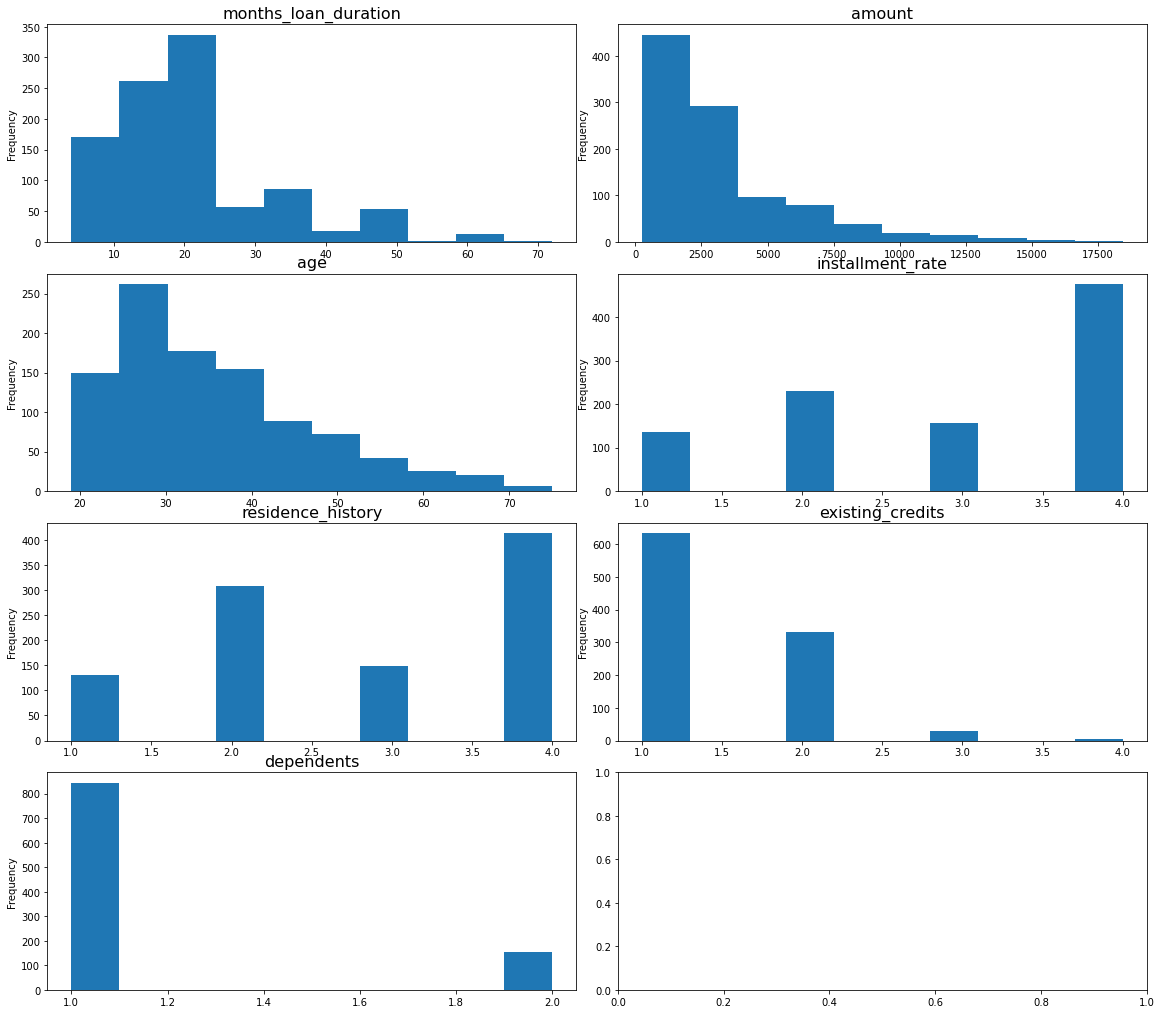

In [7]:
#Histogramas de las variables numéricas

fig, axes = plt.subplots(4, 2, figsize=(16,14))
fig.tight_layout()

ax1 = creditData["months_loan_duration"].plot.hist(ax=axes[0,0]).set_title('months_loan_duration', size=16)
ax2 = creditData["amount"].plot.hist(ax=axes[0,1]).set_title('amount', size=16)
ax3 = creditData["age"].plot.hist(ax=axes[1,0]).set_title('age', size=16)
ax4 = creditData["installment_rate"].plot.hist(ax=axes[1,1]).set_title('installment_rate', size=16)
ax5 = creditData["residence_history"].plot.hist(ax=axes[2,0]).set_title('residence_history', size=16)
ax6 = creditData["existing_credits"].plot.hist(ax=axes[2,1]).set_title('existing_credits', size=16)
ax7 = creditData["dependents"].plot.hist(ax=axes[3,0]).set_title('dependents', size=16)

### Variables categóricas

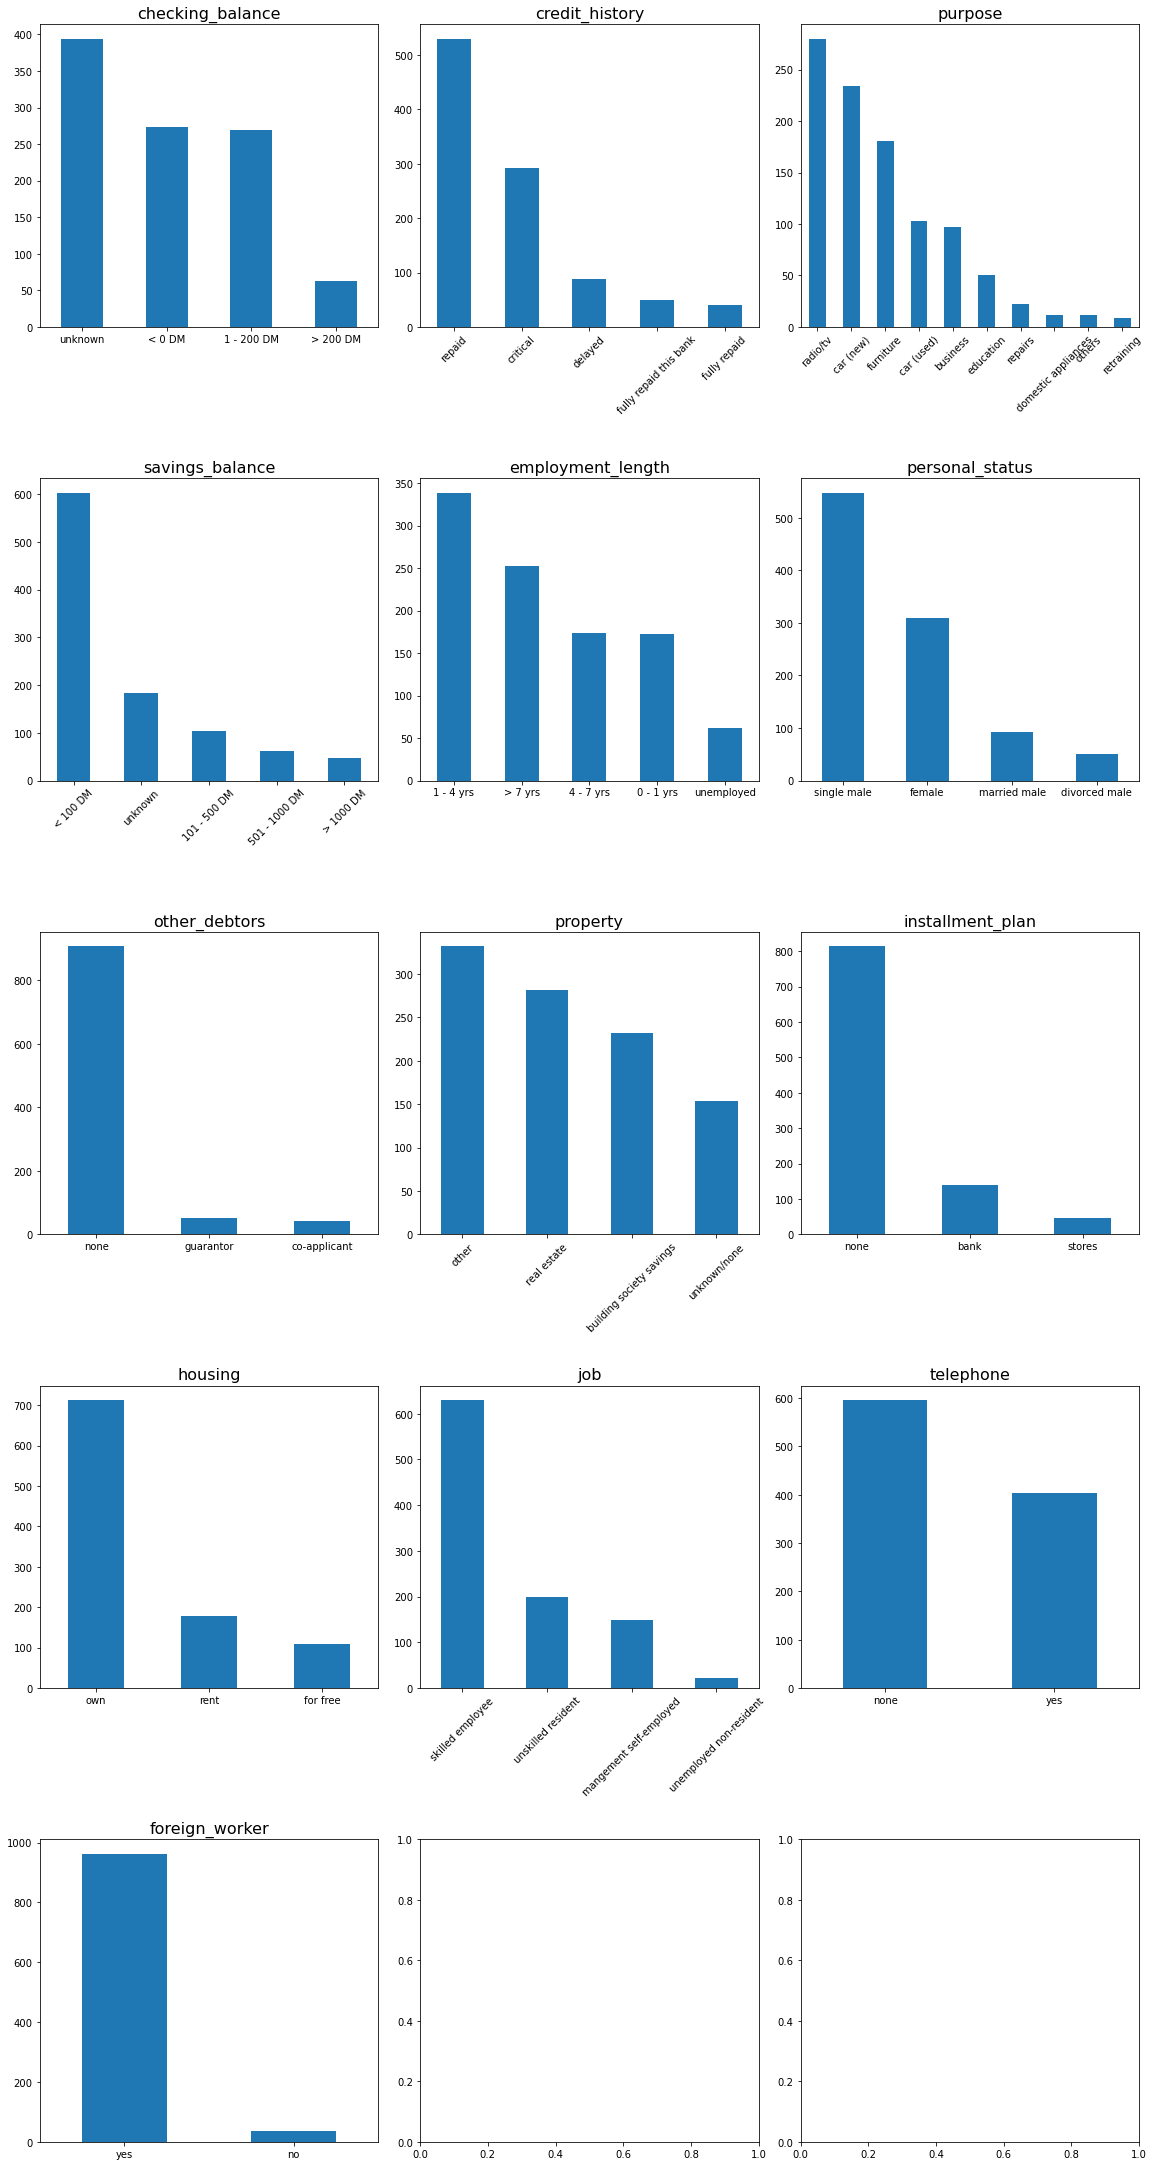

In [8]:
#Gráficos de barras de las variables categóricas.
fig, axes = plt.subplots(5, 3, figsize=(16,30))
fig.tight_layout()
fig.subplots_adjust(hspace=0.5)

ax1 = creditData["checking_balance"].value_counts().plot(ax=axes[0,0], kind='bar', rot=0).set_title('checking_balance', size=16)
ax2 = creditData["credit_history"].value_counts().plot(ax=axes[0,1], kind='bar', rot=45).set_title('credit_history', size=16)
ax3 = creditData["purpose"].value_counts().plot(ax=axes[0,2], kind='bar', rot=45).set_title('purpose', size=16)
ax4 = creditData["savings_balance"].value_counts().plot(ax=axes[1,0], kind='bar', rot=45).set_title('savings_balance', size=16)
ax5 = creditData["employment_length"].value_counts().plot(ax=axes[1,1], kind='bar', rot=0).set_title('employment_length', size=16)
ax6 = creditData["personal_status"].value_counts().plot(ax=axes[1,2], kind='bar', rot=0).set_title('personal_status', size=16)
ax7 = creditData["other_debtors"].value_counts().plot(ax=axes[2,0], kind='bar', rot=0).set_title('other_debtors', size=16)
ax8 = creditData["property"].value_counts().plot(ax=axes[2,1], kind='bar', rot=45).set_title('property', size=16)
ax9 = creditData["installment_plan"].value_counts().plot(ax=axes[2,2], kind='bar', rot=0).set_title('installment_plan', size=16)
ax10 = creditData["housing"].value_counts().plot(ax=axes[3,0], kind='bar', rot=0).set_title('housing', size=16)
ax11 = creditData["job"].value_counts().plot(ax=axes[3,1], kind='bar', rot=45).set_title('job', size=16)
ax12 = creditData["telephone"].value_counts().plot(ax=axes[3,2], kind='bar', rot=0).set_title('telephone', size=16)
ax13 = creditData["foreign_worker"].value_counts().plot(ax=axes[4,0], kind='bar', rot=0).set_title('foreign_worker', size=16)


### Variable objetivo

Text(0.5, 1.0, 'default')

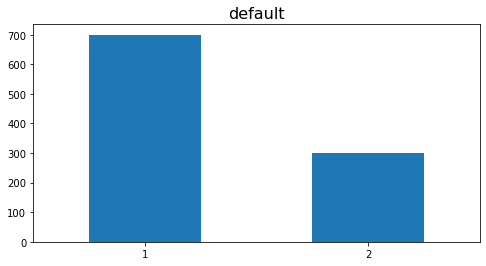

In [9]:
#Gráficos de barras de la variable objetivo
fig, axes = plt.subplots(1, 1, figsize=(8,4))

creditData["default"].value_counts().plot( kind='bar', rot=0).set_title('default', size=16)

1 es No Dafault y 2 es Default. La mayoría de casos es No Default, es decir, que se ha pagado el crédito. Los casos de la categoría 2 que son los Default son los que han entrado en impago. 

### Boxplots de variable numéricas

[Text(1, 0, 'months_loan_duration'), Text(2, 0, 'age')]

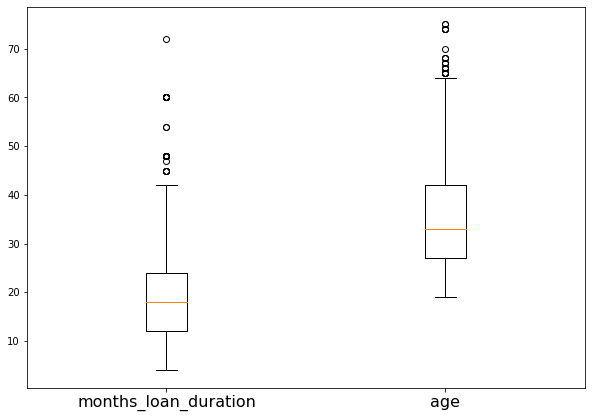

In [10]:
fig, ax = plt.subplots(figsize=(10,7))

ax.boxplot(creditData[["months_loan_duration", "age"]])

labels = ["months_loan_duration", "age"]
ax.set_xticklabels(labels, size=16)

[Text(1, 0, 'installment_rate'),
 Text(2, 0, 'residence_history'),
 Text(3, 0, 'existing_credits'),
 Text(4, 0, 'dependents')]

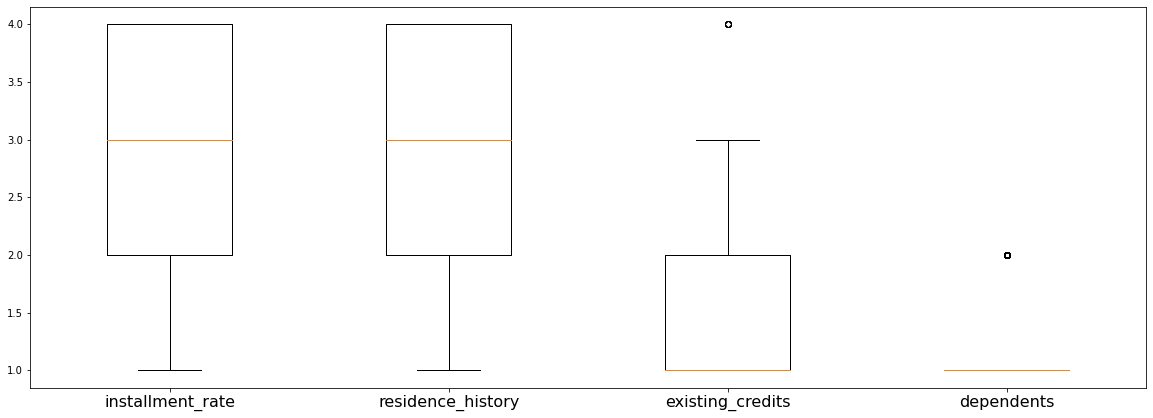

In [11]:
fig, ax = plt.subplots(figsize=(20,7))

ax.boxplot(creditData[["installment_rate", "residence_history",  "existing_credits", "dependents"]])

labels = [ "installment_rate", "residence_history",  "existing_credits", "dependents"]
ax.set_xticklabels(labels, size=16)

[Text(1, 0, 'amount')]

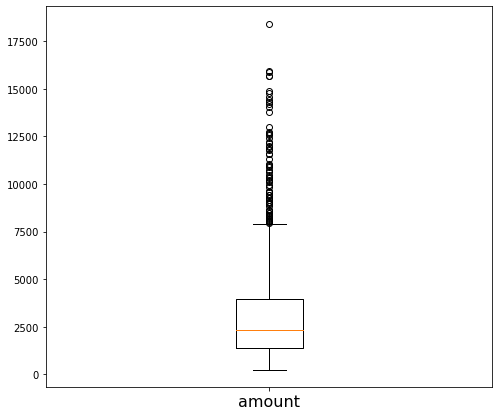

In [12]:
fig, ax = plt.subplots(figsize=(8,7))

ax.boxplot(creditData["amount"])

labels = ["amount"]
ax.set_xticklabels(labels, size=16)

Al analizar los boxplots, en algunas variables existen outliers. Sin embargo, estos parecen ser válidos y no errores. Por ejemplo, la variable edad tiene el valor máximo de 75 que se muestra en el boxplot como outlier, este es completamente válido ya que una persona si puede llegar a tener esta edad. También en el caso de la variable amount, los outliers comienzan desde la cantidad de 7882.375 DM hasta el máximo de 18424 DM, siendo valores válidos de créditos. 

## Covarianza y correlación 
### Covarianza

Creamos una matriz de covarianza de las variables de numéricas.

In [13]:
data = creditData[["months_loan_duration", "amount", "installment_rate", "residence_history", "age", "existing_credits", "dependents"]]
df = pd.DataFrame(data,columns=["months_loan_duration", "amount", "installment_rate", "residence_history", "age", "existing_credits", "dependents"])
covMatrix = pd.DataFrame.cov(df)
print (covMatrix)

                      months_loan_duration        amount  installment_rate  \
months_loan_duration            145.415006  2.127375e+04          1.008389   
amount                        21273.749776  7.967843e+06       -856.770805   
installment_rate                  1.008389 -8.567708e+02          1.251523   
residence_history                 0.453418  9.012011e+01          0.060876   
age                              -4.956995  1.050523e+03          0.741483   
existing_credits                 -0.078600  3.390690e+01          0.014003   
dependents                       -0.104069  1.752053e+01         -0.028844   

                      residence_history          age  existing_credits  \
months_loan_duration           0.453418    -4.956995         -0.078600   
amount                        90.120110  1050.522655         33.906901   
installment_rate               0.060876     0.741483          0.014003   
residence_history              1.218193     3.344975          0.057142   
age  

La covarianza entre las variables con valores positivos sugiere que las variables cambian en la misma dirección.

Mientras que la covarianza entre las variables con valores negativos, lo que indica es que las variables cambian en dirección contraria.

### Correlación 

Creamos una matriz de correlación.

In [14]:
data = creditData[["months_loan_duration", "amount", "installment_rate", "residence_history", "age", "existing_credits", "dependents"]]
df = pd.DataFrame(data,columns=["months_loan_duration", "amount", "installment_rate", "residence_history", "age", "existing_credits", "dependents"])
corrMatrix = df.corr()
print (corrMatrix)

                      months_loan_duration    amount  installment_rate  \
months_loan_duration              1.000000  0.624984          0.074749   
amount                            0.624984  1.000000         -0.271316   
installment_rate                  0.074749 -0.271316          1.000000   
residence_history                 0.034067  0.028926          0.049302   
age                              -0.036136  0.032716          0.058266   
existing_credits                 -0.011284  0.020795          0.021669   
dependents                       -0.023834  0.017142         -0.071207   

                      residence_history       age  existing_credits  \
months_loan_duration           0.034067 -0.036136         -0.011284   
amount                         0.028926  0.032716          0.020795   
installment_rate               0.049302  0.058266          0.021669   
residence_history              1.000000  0.266419          0.089625   
age                            0.266419  1.000000   

La correlación entre la mayoría de variables es baja, la única que se puede destacar como alta es entre la variable amount y months_loan_duration con 0.62.

## Grado de asociación

Fuente: https://www.kaggle.com/code/chrisbss1/cramer-s-v-correlation-matrix/notebook

Escogemos solo las variables categoricas. 

In [15]:
data = creditData.drop(["months_loan_duration", "amount", "installment_rate", "residence_history", "age", "existing_credits", "dependents"], axis=1)
data.head()

,checking_balance,credit_history,purpose,savings_balance,employment_length,personal_status,other_debtors,property,installment_plan,housing,default,telephone,foreign_worker,job
0,< 0 DM,critical,radio/tv,unknown,> 7 yrs,single male,none,real estate,none,own,1,yes,yes,skilled employee
1,1 - 200 DM,repaid,radio/tv,< 100 DM,1 - 4 yrs,female,none,real estate,none,own,2,none,yes,skilled employee
2,unknown,critical,education,< 100 DM,4 - 7 yrs,single male,none,real estate,none,own,1,none,yes,unskilled resident
3,< 0 DM,repaid,furniture,< 100 DM,4 - 7 yrs,single male,guarantor,building society savings,none,for free,1,none,yes,skilled employee
4,< 0 DM,delayed,car (new),< 100 DM,1 - 4 yrs,single male,none,unknown/none,none,for free,2,none,yes,skilled employee


Utilizamos **Label Encoding** para codificar las variables categoricas y colocarlas en numeros enteros.  

In [16]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

for i in data.columns :
  data_encoded[i]=label.fit_transform(data[i])

data_encoded.head()

,checking_balance,credit_history,purpose,savings_balance,employment_length,personal_status,other_debtors,property,installment_plan,housing,default,telephone,foreign_worker,job
0,1,0,7,4,3,3,2,2,1,1,0,1,1,1
1,0,4,7,2,1,1,2,2,1,1,1,0,1,1
2,3,0,4,2,2,3,2,2,1,1,0,0,1,3
3,1,4,5,2,2,3,1,0,1,0,0,0,1,1
4,1,1,1,2,1,3,2,3,1,0,1,0,1,1


Construimos la función V de Cramer

In [17]:
from scipy.stats import chi2_contingency

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

Contruimos la matriz

In [18]:
rows= []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)

df

,checking_balance,credit_history,purpose,savings_balance,employment_length,personal_status,other_debtors,property,installment_plan,housing,default,telephone,foreign_worker,job
checking_balance,1.00,0.02,0.02,0.03,0.01,0.00,0.01,0.01,0.00,0.01,0.12,0.01,0.01,0.01
credit_history,0.02,1.00,0.03,0.01,0.01,0.01,0.01,0.01,0.05,0.01,0.06,0.01,0.00,0.00
purpose,0.02,0.03,1.00,0.01,0.01,0.02,0.03,0.04,0.02,0.04,0.03,0.05,0.03,0.04
savings_balance,0.03,0.01,0.01,1.00,0.01,0.00,0.01,0.01,0.00,0.00,0.04,0.01,0.00,0.00
employment_length,0.01,0.01,0.01,0.01,1.00,0.03,0.01,0.02,0.00,0.03,0.02,0.02,0.01,0.10
personal_status,0.00,0.01,0.02,0.00,0.03,1.00,0.00,0.01,0.00,0.04,0.01,0.01,0.00,0.01
other_debtors,0.01,0.01,0.03,0.01,0.01,0.00,1.00,0.02,0.00,0.00,0.01,0.01,0.01,0.01
property,0.01,0.01,0.04,0.01,0.02,0.01,0.02,1.00,0.01,0.31,0.02,0.04,0.02,0.04
installment_plan,0.00,0.05,0.02,0.00,0.00,0.00,0.00,0.01,1.00,0.01,0.01,0.00,0.00,0.00
housing,0.01,0.01,0.04,0.00,0.03,0.04,0.00,0.31,0.01,1.00,0.02,0.01,0.01,0.02


Agregamos un mapa de calor a la matriz

C:\Users\Erika Martinez\AppData\Local\Temp\ipykernel_12176\2206609884.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df, dtype=np.bool)


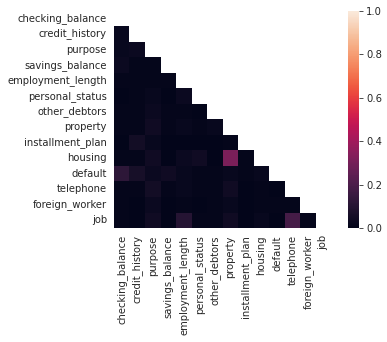

In [19]:
import seaborn as sns

mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
  ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True)

plt.show()

Los valores de la V de Cramér  (https://en.wikipedia.org/wiki/Cramér%27s_V) entre 0.1 y 0.3 nos indican que la asociación estadística es baja, y entre 0.3 y 0.5 se puede considerar una asociación media. Finalmente, si los valores fueran superiores a 0.5, la asociación estadística entre las variables sería alta.

Como podemos observar en el mapa de calor no existe una asociación estadística alta entre las variables categóricas, el mayor valor es el de 0.31 entre las variables *property* y *housing*.

## EDA

Text(0, 0.5, 'Cuenta')

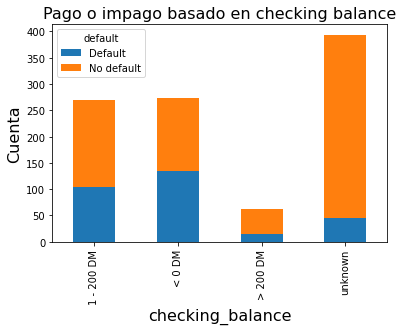

In [20]:
#Reemplazamos el valor 1 con la No default
creditData_better = creditData["default"].replace(1, "No default")

#Reemplazamos el valor 2 con la categoria Default
creditData_better = creditData_better.replace(2, "Default")

#Crosstab de las variables con el checking_balance y default
crosstab = pd.crosstab(creditData["checking_balance"], creditData_better)

#Dibujamos la crosstable
ax = crosstab.plot.bar(stacked=True) 
ax.set_title("Pago o impago basado en checking balance", size = 16)
ax.set_xlabel("checking_balance", size = 16)
ax.set_ylabel("Cuenta", size = 16)

Se observa que la mayoría de personas de la categoría *unknown* y *>200 DM* son *No default*. Mientras que en las categorias *1-200 DM* y *<0 DM* alrededor de la mitad son *Default* y la otra mitad son *No default*. 

Text(0, 0.5, 'Cuenta')

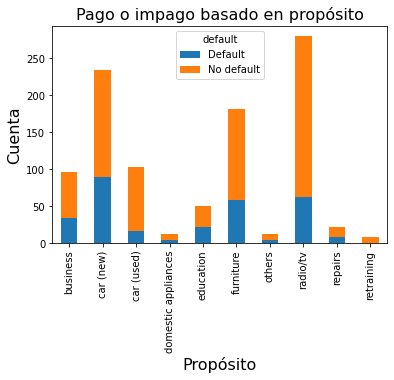

In [21]:
#Reemplazamos el valor 1 con la No default
creditData_better = creditData["default"].replace(1, "No default")

#Reemplazamos el valor 2 con la categoria Default
creditData_better = creditData_better.replace(2, "Default")

#Crosstab de las variables con el purpose y default
crosstab = pd.crosstab(creditData["purpose"], creditData_better)

#Dibujamos la crosstable
ax = crosstab.plot.bar(stacked=True) 
ax.set_title("Pago o impago basado en propósito", size = 16)
ax.set_xlabel("Propósito", size = 16)
ax.set_ylabel("Cuenta", size = 16)

Vemos que existen más créditos para carros nuevos, radios/tv y muebles. En estas tres categorías la mayoría se pagan. En el caso de carros nuevos es donde hay mas impagos comparado con las otras dos categorias. 

Text(0, 0.5, 'Cuenta')

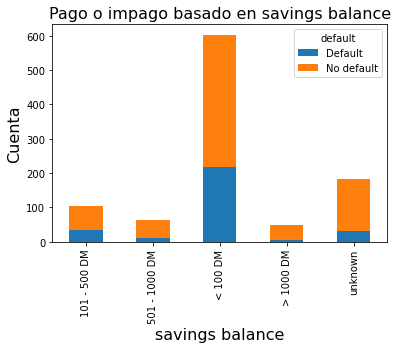

In [22]:
#Reemplazamos el valor 1 con la No default
creditData_better = creditData["default"].replace(1, "No default")

#Reemplazamos el valor 2 con la categoria Default
creditData_better = creditData_better.replace(2, "Default")

#Crosstab de las variables con el savings_balance y default
crosstab = pd.crosstab(creditData["savings_balance"], creditData_better)

#Dibujamos la crosstable
ax = crosstab.plot.bar(stacked=True) 
ax.set_title("Pago o impago basado en savings balance", size = 16)
ax.set_xlabel("savings balance", size = 16)
ax.set_ylabel("Cuenta", size = 16)

La mayoría de créditos lo tienen personas con menos de 100 DM en su savings balance. De estos la mayoría son *No default*, pero un porcentaje alto son *Default*. En la categoría *unknown* la mayoría son *No default*. 

Text(0, 0.5, 'Cuenta')

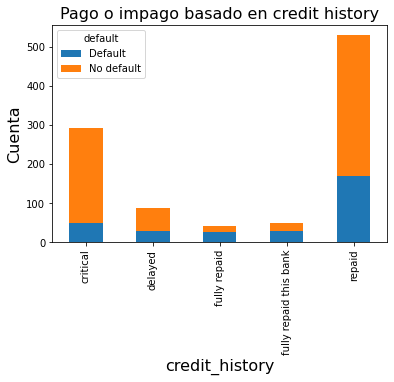

In [23]:
#Reemplazamos el valor 1 con la No default
creditData_better = creditData["default"].replace(1, "No default")

#Reemplazamos el valor 2 con la categoria Default
creditData_better = creditData_better.replace(2, "Default")

#Crosstab de las variables con el credit_history y default
crosstab = pd.crosstab(creditData["credit_history"], creditData_better)

#Dibujamos la crosstable
ax = crosstab.plot.bar(stacked=True) 
ax.set_title("Pago o impago basado en credit history", size = 16)
ax.set_xlabel("credit_history", size = 16)
ax.set_ylabel("Cuenta", size = 16)

Analizando el historial crediticio, la mayoría de personas están en un categoría *critica* o *repagado*. De estas categorías, la mayoría son *No default*. Las categorías *completamente repagado* y *completamente repagado a este banco* tienen su la mayoría de casos como *Default*. 

Text(0, 0.5, 'Cuenta')

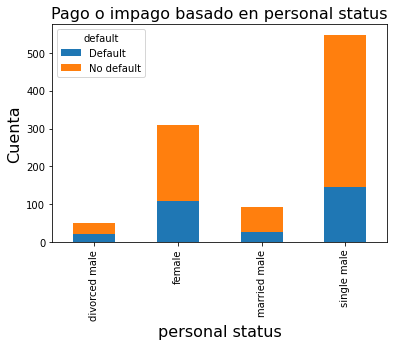

In [24]:
#Reemplazamos el valor 1 con la No default
creditData_better = creditData["default"].replace(1, "No default")

#Reemplazamos el valor 2 con la categoria Default
creditData_better = creditData_better.replace(2, "Default")

#Crosstab de las variables con el personal_statuscredit_history y default
crosstab = pd.crosstab(creditData["personal_status"], creditData_better)

#Dibujamos la crosstable
ax = crosstab.plot.bar(stacked=True) 
ax.set_title("Pago o impago basado en personal status", size = 16)
ax.set_xlabel("personal status", size = 16)
ax.set_ylabel("Cuenta", size = 16)

La mayoría de personas con créditos son mujeres u hombres solteros. En estas dos categorías la mayoría son *No default*. En la categoría *hombre divorciado* aproximadamente la mitad es *Default* 

# Preparación y creación del árbol de decisión

## Arbol de decisión preliminario

### Separación del conjunto de datos en variables dependiente e independiente

Para hacer el árbol de decisión, primero separamos el conjunto de datos en dos partes: las columnas de datos que se usan para hacer las clasificaciones y la columna que queremos predecir. En este caso, la variable que queremos predecir se llama default y tiene como valores el pago o impago de créditos bancarios. 

In [25]:
#Separamos los datos en X y Y
X = creditData.drop("default", axis=1).copy() # Datos para hacer la clasificacion
Y = creditData["default"].copy() #Variable que queremos predecir. 

Revisamos otra vez los tipos de datos de las variables de *X*. 

In [26]:
X.dtypes

checking_balance        object
months_loan_duration     int64
credit_history          object
purpose                 object
amount                   int64
savings_balance         object
employment_length       object
installment_rate         int64
personal_status         object
other_debtors           object
residence_history        int64
property                object
age                      int64
installment_plan        object
housing                 object
existing_credits         int64
dependents               int64
telephone               object
foreign_worker          object
job                     object
dtype: object

Como ya conociamos, tenemos 7 variables numericas y el resto son categoricas. Debemos recordar que los arboles de decision no soportan datos categoricos. Por lo tanto, para usar las variables categoricas en el arbol de decision, debemos convertir estas variables en variables binarias y para realizar esto usamos **One Hot Encoding**. 

In [27]:
#Utilizamos One Hot Encoding para codificar las variables categoricas.
X_encoded = pd.get_dummies(X, columns=["checking_balance", "credit_history", "purpose", "savings_balance", "employment_length", "personal_status","other_debtors", "property", "installment_plan", "housing", "job", "telephone","foreign_worker"])
X_encoded.head()

,months_loan_duration,amount,installment_rate,residence_history,age,existing_credits,dependents,checking_balance_1 - 200 DM,checking_balance_< 0 DM,checking_balance_> 200 DM,...,housing_own,housing_rent,job_mangement self-employed,job_skilled employee,job_unemployed non-resident,job_unskilled resident,telephone_none,telephone_yes,foreign_worker_no,foreign_worker_yes
0,6,1169,4,4,67,2,1,0,1,0,...,1,0,0,1,0,0,0,1,0,1
1,48,5951,2,2,22,1,1,1,0,0,...,1,0,0,1,0,0,1,0,0,1
2,12,2096,2,3,49,1,2,0,0,0,...,1,0,0,0,0,1,1,0,0,1
3,42,7882,2,4,45,1,2,0,1,0,...,0,0,0,1,0,0,1,0,0,1
4,24,4870,3,4,53,2,2,0,1,0,...,0,0,0,1,0,0,1,0,0,1


Como vemos, cada categoria de las variables categoricas se han convertido en una variable por si misma, teniendo el valor de 1 o 0. Asi vemos que hay 61 columnas en total en nuestro conjunto de datos. 

### Contrucción de un árbol de decisión preliminario

Ahora clasificamos el conjunto de datos en datos de **entrenamiento** y datos de **testeo**. Utilizamos 2/3 de los datos para entrenamiento y 1/3 para testear. 

In [28]:
#Separamos los datos en datos de entrenamiento y de test
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size=0.33, random_state=42)

#Creamos un arbol de decision y lo entrenamos con los datos de entrenamiento
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, Y_train)

Mostramos el arbol creado con los datos de entrenamiento de todas las variables del conjunto de datos. 

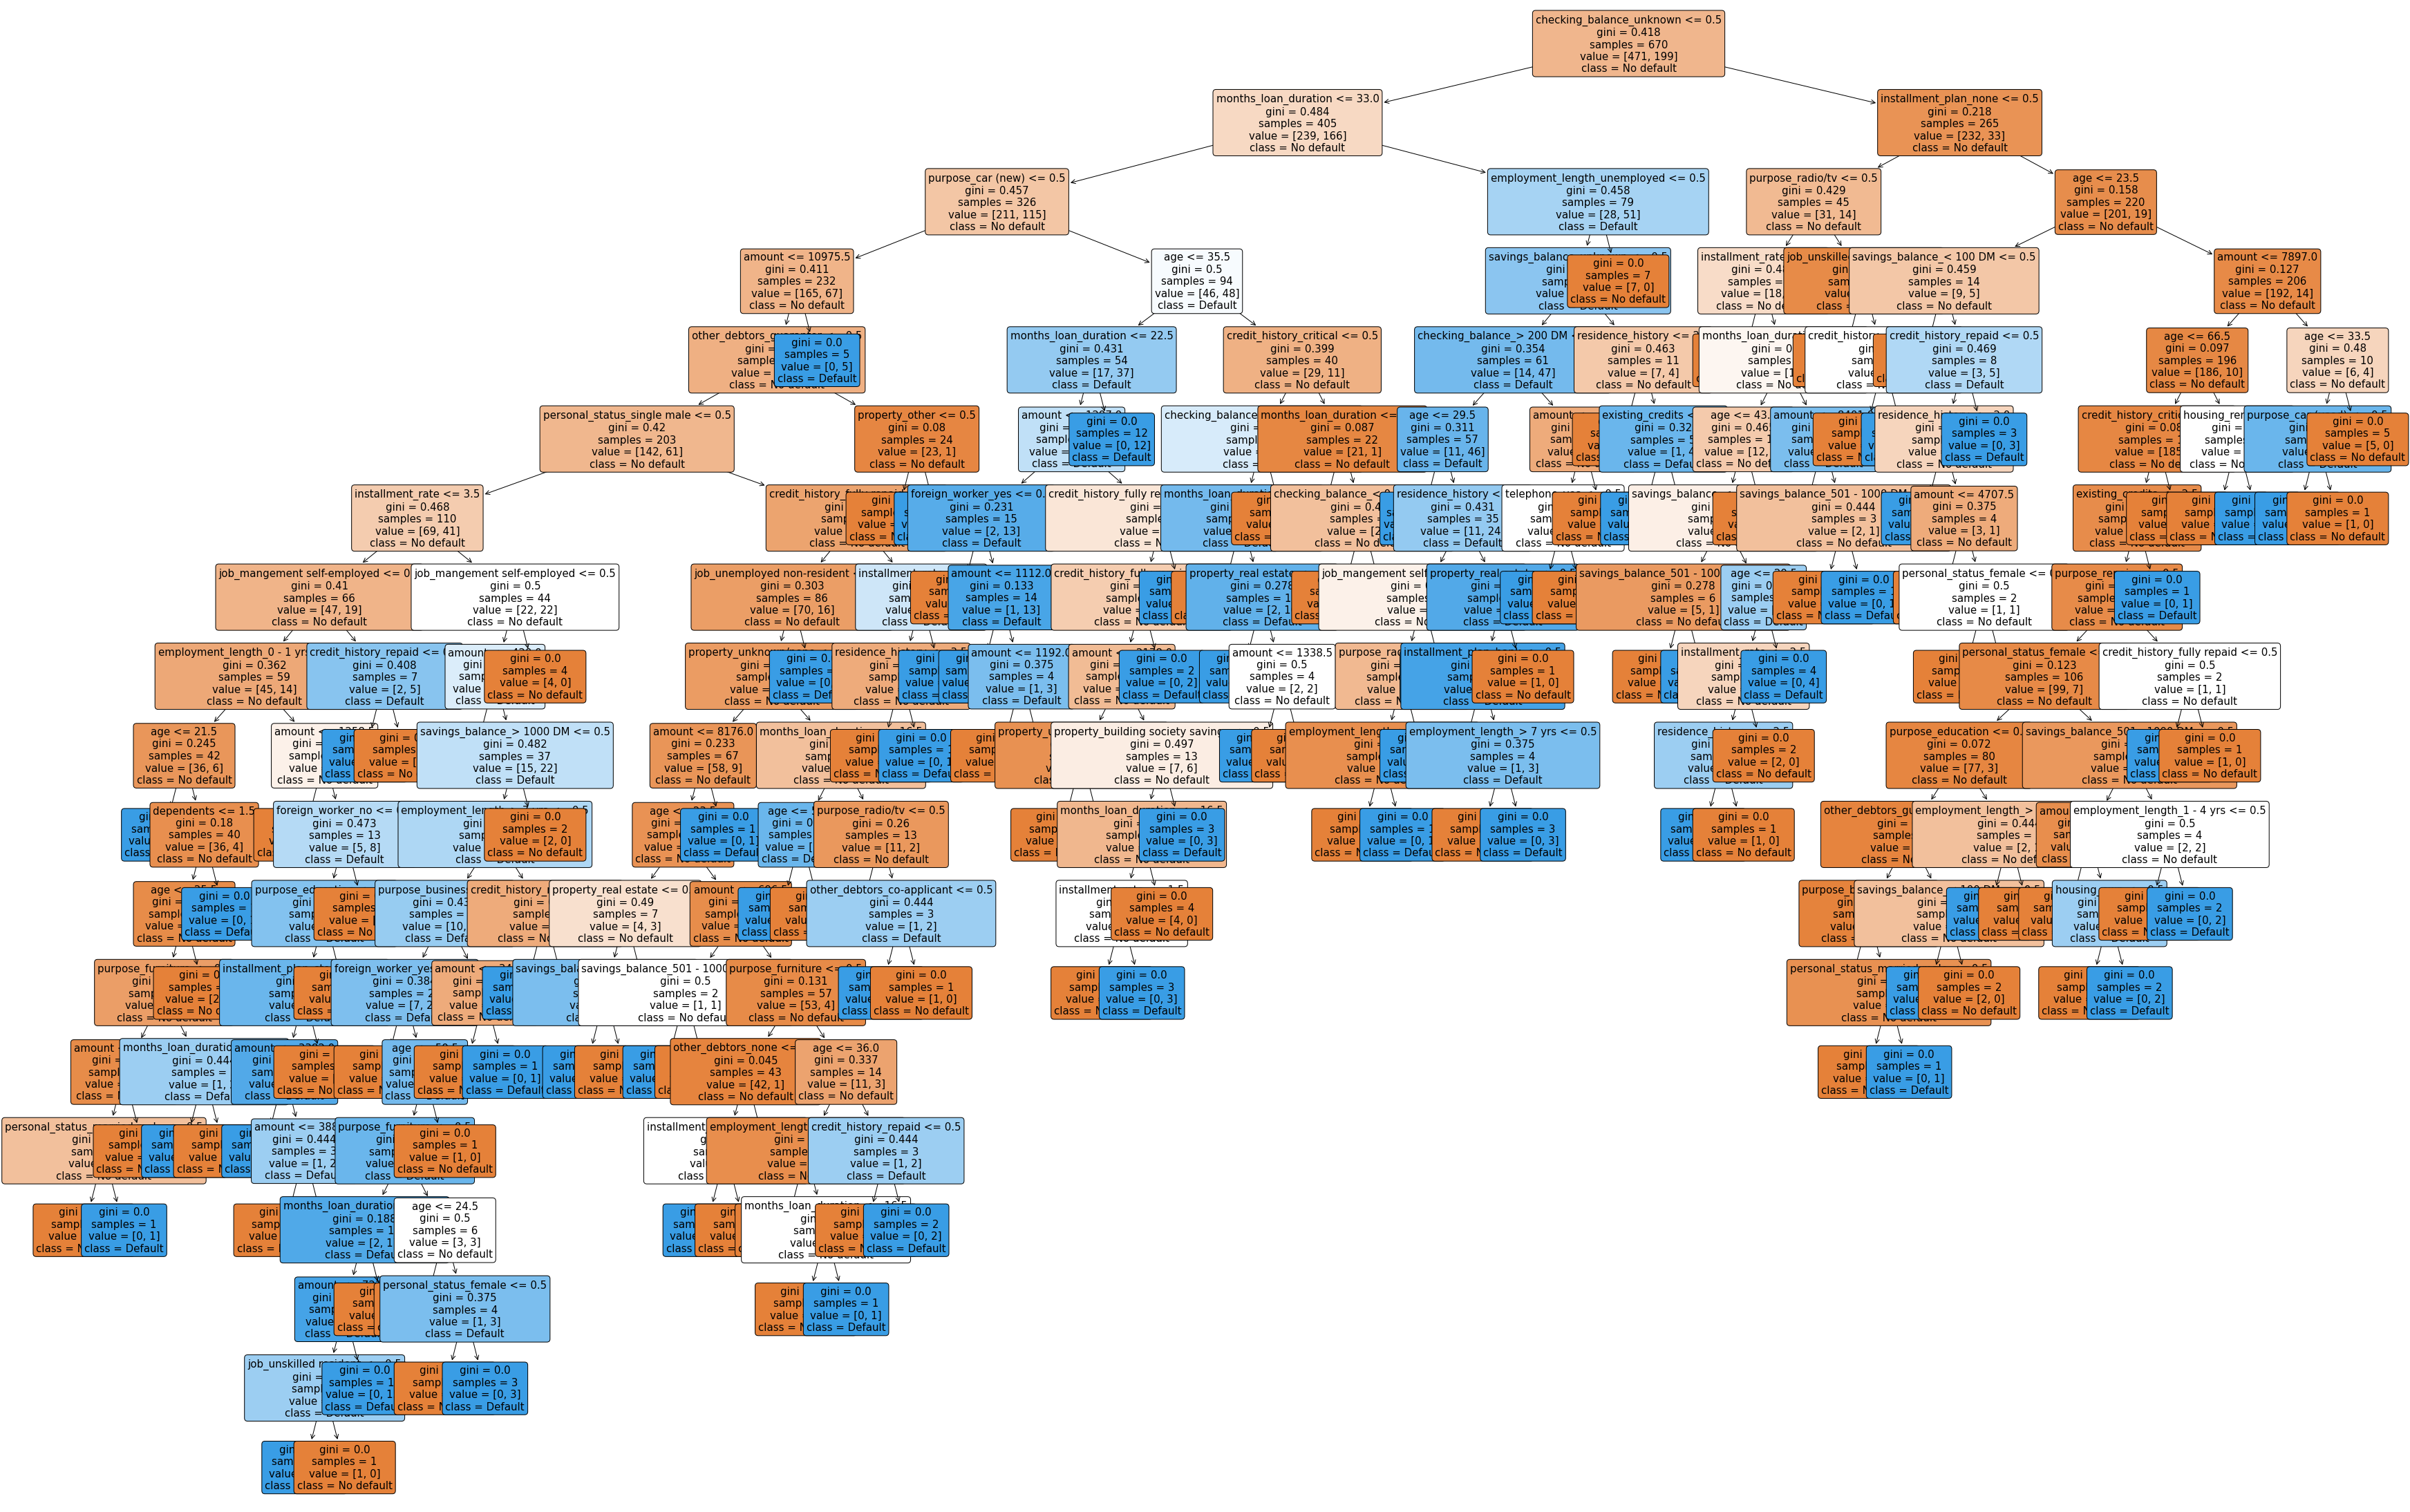

In [29]:
#Visualizamos el arbol
plt.figure(figsize=(60, 40))
plot_tree(clf_dt, 
         filled=True,
         rounded=True,
         fontsize=15,
         class_names=["No default", "Default"],
         feature_names=X_encoded.columns);

Como vemos es un arbol de decision grande y necesita ser optimizado. 

Las reglas generales que podemos observar en el árbol son:
+ Si el *checking_balance* es *unknown* se predice como *No default* (se paga), con 235 de 264 muestras dando este resultado.
+ Si el *checking_balance* no es *unknown* y la duracion del credito es menor que 33 meses, entonces es mas probable que se prediga como *No default* con 211 de 326 muestras.
+ Si el *checking_balance* no es *unknown* y la duracion del credito es mayor que 33 meses entonces es mas probable que se prediga como *No default* con 51 de 79 muestras.

Con una **matriz de confusion**, vemos como actuan los datos del conjunto de **testeo** en el arbol recien creado.

C:\Users\Erika Martinez\Anaconda\envs\Env R y Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


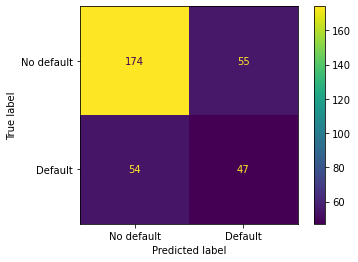

In [30]:
#Matriz de confusion
plot_confusion_matrix(clf_dt, X_test, Y_test, display_labels=["No default", "Default"] )

En la matriz de confusion, vemos que de las **174 + 55 = 229** personas que no estaban en impago, **174 (76%)** fueron correctamente clasificadas. Mientras que de las **54 + 47 = 101** personas que estan en impago, solo **47 (47%)** fueron clasificadas correctamente. La exactitud es del **67%**.

Ahora vemos otros valores de evaluacion del arbol:

In [31]:
predic1 = clf_dt.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(Y_test, predic1)
print("El valor de exactitud es {:.2%}".format(accuracy1))

from sklearn.metrics import precision_score
precision1 = precision_score(Y_test, predic1)
print("El valor de precision es {:.2%}".format(precision1))

from sklearn.metrics import recall_score
recall1 = recall_score(Y_test, predic1)
print("El valor de sensibilidad es {:.2%}".format(recall1))

El valor de exactitud es 66.97%
El valor de precision es 76.32%
El valor de sensibilidad es 75.98%


In [32]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, predic1, target_names=["No default", "Default"]))

              precision    recall  f1-score   support

  No default       0.76      0.76      0.76       229
     Default       0.46      0.47      0.46       101

    accuracy                           0.67       330
   macro avg       0.61      0.61      0.61       330
weighted avg       0.67      0.67      0.67       330



El árbol tiene una exactitud media y no reacciona muy bien especialmente al predecir la categoría default (no pago) prediciendo correctamente solo el 47% de las personas que realmente no han pagado. Como se menciona en la fuente de donde se obtuvo el conjunto de datos https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data), es peor si personas que no han pagado se clasifican como que si han pagado que personas que si han pagado se clasifiquen como que no han pagado. 

Por lo tanto, el arbol puede ser mejorado utilizando las variables que mas impacto tienen en la prediccion de pago o impago de la variable default. Tambien puede ser que se haya sobreajustado (overfit) a los datos de entrenamiento. Para resolver esta situacion, necesitariamos podar el arbol. 

### Nivel de importancia de las variables

Podemos obtener informacion de que tanta influencia ha tenido cada variable en la prediccion de pago o impago. 

In [33]:
#Obtenemos valores de la importancia de las variables
feature_names = X_encoded.columns

feature_importance = pd.DataFrame(clf_dt.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance.head(20)

,0
amount,0.114081
age,0.109747
checking_balance_unknown,0.093235
months_loan_duration,0.091849
residence_history,0.036756
installment_rate,0.035692
purpose_radio/tv,0.029039
job_mangement self-employed,0.028520
credit_history_repaid,0.025164
credit_history_critical,0.024316


In [ ]:
feature_importance.head(20).plot(kind="bar")

## Árbol de decisión optimizado

Decidimos desordenar los datos del conjunto original, con el fin de prevenir que algunos datos se encuentren en cierto orden,  asegurando que haya diversidad en el grupo de entrenamiento como en el de testeo, y de esa manera obtener un mejor resultado en la creación y testeo del árbol. 

In [ ]:
creditDataRandom = creditData.sample(frac=1, random_state=1600)
creditDataRandom.head()

### Separación del conjunto de datos en variables dependiente e independiente

Con los datos desordenados, ahora escogemos solo las variables que tuvieron mayor importancia en la predicción de pago o impago. Del conjunto original de datos (sin codificar), decidimos escoger 5 variables **númericas** (*amount, age, months_loan_duration, residence_history, installment_rate*) y 7 variables **categoricas** (*checking_balance, purpose, job, credit_history, employment_length, savings_balance, property*).

In [ ]:
#Separamos los datos en X y Y
X2 = creditDataRandom[["amount", 
                     "age", 
                     "checking_balance", 
                     "months_loan_duration", 
                     "residence_history", 
                     "installment_rate", 
                     "purpose", 
                     "job", 
                     "credit_history",
                     "employment_length",
                     "savings_balance",
                     "property"]].copy()
Y2 = creditDataRandom["default"].copy()

Codificamos nuevamente las variables categóricas del nuevo conjunto de datos con el número reducido de variables. 

In [ ]:
#Utilizamos One Hot Encoding para codificar las variables categoricas.
X_encoded2 = pd.get_dummies(X2, columns=["checking_balance", "credit_history", "purpose", "savings_balance", "employment_length",  "property",   "job"])
X_encoded2.head()

Como vemos ahora, con las selección de **12** de las **20** variables para la clasificación, la codificación ha resultado en 42 columnas en total, en comparación de las 61 variables en la codificación realizada anteriormente. 

### Contrucción de un árbol de decisión optimizado

De nuevo, clasificamos el conjunto de datos en datos de **entrenamiento** y datos de **testeo**. Utilizamos 2/3 de los datos para entrenamiento y 1/3 para testear.

In [ ]:
#Separamos los datos en datos de entrenamiento y de test
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_encoded2, Y2, test_size=0.33, random_state=42)

#Creamos un arbol de decision y lo entrenamos con los datos de entrenamiento
clf_dt2 = DecisionTreeClassifier(random_state=42)
clf_dt2 = clf_dt.fit(X_train2, Y_train2)

In [ ]:
#Visualizamos el arbol
plt.figure(figsize=(60, 40))
plot_tree(clf_dt2, 
         filled=True,
         rounded=True,
         fontsize=15,
         class_names=["No default", "Default"],
         feature_names=X_encoded2.columns);

El árbol sigue siendo bastante extenso, lo cual lo mejoraremos en los siguientes pasos. 

Las reglas generales que podemos observar en el árbol son:
+ Si el *checking_balance* es desconocido/unknown se predice como *No default* (se paga), con 235 de 264 muestras dando este resultado. 
+ Si el *checking_balance* no es desconocido/unknown y la duración del crédito es menor que 22.5 meses entonces es mas probable que se prediga como *No default* con 160 de 231 muestras. 
+ Si el *checking_balance* no es desconocido/unknown y la duración del crédito es mayor que 22.5 meses entonces es mas probable que se prediga como *Default* con 97 de 175 muestras. 

In [ ]:
#Matriz de confusion
plot_confusion_matrix(clf_dt2, X_test2, Y_test2, display_labels=["No default", "Default"] )

Con este nuevo árbol, al haber utilizado solo las variables más importantes, la clasificación parece haber empeorado ligeramente. De las **170 + 57 = 227** personas que han pagado, **170 (75%)** han sido correctamente clasificados. Mientras que de las **56 + 47 = 103** personas que estan en impago, solo **47 (46%)** fueron clasificadas correctamente. Dando una exactitud de **66%**. 

Vemos otros valores de evaluacion del modelo.

In [ ]:
predic2 = clf_dt2.predict(X_test2)

from sklearn.metrics import accuracy_score
accuracy2 = accuracy_score(Y_test2, predic2)
print("El valor de exactitud es {:.2%}".format(accuracy2))

from sklearn.metrics import precision_score
precision2 = precision_score(Y_test2, predic2)
print("El valor de precision es {:.2%}".format(precision2))

from sklearn.metrics import recall_score
recall2 = recall_score(Y_test2, predic2)
print("El valor de sensibilidad es {:.2%}".format(recall2))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test2, predic2, target_names=["No default", "Default"]))

Ahora vemos si al podar el árbol esta clasificación mejora. 

### Poda de complejidad de costos: Visualización de alpha

Los **árboles de decisión** son notorios por **sobreajustar (overfit)** los datos de **entrenamiento**, y existen varios parámetros como *max_depth* y *min_samples*, los cuales están diseñados para reducir el sobreajuste. Sin embargo, podar el árbol con **complejidad de costos** puede simplificar todo el proceso al encontrar un árbol más pequeño que mejore la precisión con el **conjunto de datos de testeo**.

Podar el árbol de decisión se trata de encontrar el valor correcto para el parámetro de poda alpha, el cual controla que tan poco o mucho se poda. Una manera para encontrar el valor más óptimo de alpha is el de graficar la precisión del árbol como función de diferentes valores. Haremos esto para el conjunto de datos de **entrenamiento** y de **testeo**. 

Primero, extraemos los diferentes valores de alpha que están disponibles para este árbol y construimos un árbol podado para cada valor de alpha. 

**Nota**: Omitimos el máximo valor de alpha con ccp_alphas=ccp_alphas[:-1] porque se podarían todas las hojas, dejandonos con solo la raíz en vez de un árbol. 

Fuente: https://www.youtube.com/watch?v=q90UDEgYqeI 

In [ ]:
path = clf_dt2.cost_complexity_pruning_path(X_train2, Y_train2) #Determina los valores de alpha
ccp_alphas = path.ccp_alphas #Extrae diferentes valores para alpha
ccp_alphas = ccp_alphas[:-1] #Excluye el maximo valor de alpha

clf_dts = [] #Creamos un array donde pondremos arboles de decision

#Ahora creamos un arbol de decision por valor de alpha y lo guardamos en el array
for ccp_alpha in ccp_alphas:
    clf_dt2 = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt2.fit(X_train2, Y_train2)
    clf_dts.append(clf_dt2)

Ahora graficamos la precisión de los árboles usando el **conjunto de datos de entrenamiento** y el **conjunto de datos de testeo** como una función de alpha. 

In [ ]:
train_scores = [clf_dt2.score(X_train2, Y_train2) for clf_dt2 in clf_dts]
test_scores = [clf_dt2.score(X_test2, Y_test2) for clf_dt2 in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("precision")
ax.set_title("Precision vs alpha para el conjunto de entrenamiento y testeo")
ax.plot(ccp_alphas, train_scores, marker='o', label="entrenamiento", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="testeo", drawstyle="steps-post")
ax.legend()
plt.show()

Vemos que, por ejemplo, cuando alpha es igual a 0 el conjunto de datos de entrenamiento responde bien, pero no el conjunto de datos de testeo. Mientras alpha aumenta, la precisión de testeo mejora. El mejor valor parece ser alrededor de **0.005**.

Dado que hay muchas maneras en las que pudimos haber dividido el conjunto de datos originales en datos de **entrenamiento** y de **testeo**, usamos **validación cruzada** para asegurarnos de esto. 

### Poda de complejidad de costos: Validacion cruzada para encontrar el mejor alpha

En vez de solo escoger un conjunto de datos de **entrenamiento** y otro de **testeo**, usamos validacion cruzada para encontrar el valor optimo de *ccp_alpha*, ya que este es sensible a conjuntos de datos. 

Fuente: https://www.youtube.com/watch?v=q90UDEgYqeI 

In [ ]:
# Creamos un array para guardar los resultados de cada carpeta (o fold) durante la validacion cruzada
alpha_loop_values = []

# Para cada posible valor de alpha, utilizaremos 10 carpetas.
# Entonces, guardamos la media y la desviacion estandar de los valores (la precision) para cada carpeta
for ccp_alpha in ccp_alphas:
    clf_dt2 = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt2, X_train2, Y_train2, cv=10)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

In [ ]:
#Ahora dibujamos un grafico de las medias y desviacion estandar de los valores (scores) para cada valor posible de alpha
alpha_results = pd.DataFrame(alpha_loop_values,
                            columns=["alpha", "precision_media", "Std"])
alpha_results.plot(x="alpha", y="precision_media", yerr="Std", marker="o", linestyle="--")

Usando validacion cruzada podemos ver que el ccp_alpha necesita ser alrededor de **0.005**. Podemos encontrar el valor exacto con:

In [ ]:
alpha_results[(alpha_results["alpha"]>0.005) & (alpha_results["alpha"]<0.0075)]

Basandonos en la grafica y los valores exactos podemos ver que el mejor valor para ccp_alpha es **0.005174**, asi que lo guardamos en una variable para usarlo en el modelo. 

In [ ]:
ideal_ccp_alpha = alpha_results[(alpha_results["alpha"]>0.005) & (alpha_results["alpha"]<0.0075)]["alpha"].iloc[0]
ideal_ccp_alpha

### Modelo final de arbol de decision

Ahora que tenemos el mejor valor de alpha, lo utilizamos al crear el árbol de decisión usando *ccp_alpha=ideal_ccp_alpha*.

In [1]:
#Contruimos un nuevo arbol de decision, pero esta vez con el valor optimo de alpha
clf_dt_podado = DecisionTreeClassifier(random_state = 42, ccp_alpha = ideal_ccp_alpha)
clf_dt_podado = clf_dt_podado.fit(X_train2, Y_train2)

NameError: name 'DecisionTreeClassifier' is not defined

Ahora dibujamos otra matriz de confusion para ver si el arbol podado es mejor.

In [2]:
plot_confusion_matrix(clf_dt_podado, X_test2, Y_test2, display_labels=["No default", "Default"])

NameError: name 'plot_confusion_matrix' is not defined

Vemos que la clasificación si ha mejorado. De las **185 + 42 = 227** personas que han pagado, **185 (81%)** han sido correctamente clasificados. Mientras que de las **51 + 52 = 103** personas que estan en impago, **52 (50%)** fueron clasificadas correctamente.

Vemos a continuación algunas de las medidas de evaluación de la clasificación del árbol de decisión.

In [ ]:
predicciones = clf_dt_podado.predict(X_test2)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test2, predicciones)
print("El valor de exactitud es {:.2%}".format(accuracy))

from sklearn.metrics import precision_score
precision = precision_score(Y_test2, predicciones)
print("El valor de precision es {:.2%}".format(precision))

from sklearn.metrics import recall_score
recall = recall_score(Y_test2, predicciones)
print("El valor de sensibilidad es {:.2%}".format(recall))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test2, predicciones, target_names=["No default", "Default"]))

Dibujamos el arbol de decision final. 

In [ ]:
plt.figure(figsize=(15, 15))
plot_tree(clf_dt_podado,
         filled=True,
         rounded=True,
         fontsize=10,
         class_names=["No default", "Default"],
         feature_names=X_encoded2.columns);

### Obtención de reglas del modelo

Fuente: https://mljar.com/blog/extract-rules-decision-tree/ 

In [ ]:
text_representation = tree.export_text(clf_dt_podado, feature_names= list(X_encoded2.columns))
print(text_representation)

Recordemos que la clase 1 representa *No default* (se paga el crédito) y la clase 2 representa *Default* (no se paga el crédito). 

En las siguientes instancias se paga el crédito (No default):
+ Cuando *checking_balance* es *unknown*.
+ Cuando el *checking_balance* no es *unknown*, la duración del crédito es menor que 22.5 meses, la historia crediticia no es *fully repaid*, la cantidad del crédito es mayor que 1296.  
+ Cuando el *checking_balance* no es *unknown*, la duración del crédito es menor que 22.5 meses, la historia crediticia no es *fully repaid*, la cantidad del crédito es menor que 1296 y la propiedad no es *other*. 
+ Cuando el *checking_balance* no es *unknown*, la duración del crédito es mayor que 22.5 meses, el *saving_balance* es *unknown* y el *checking_balance* no es menor que 0. 

En las siguientes instancias no se paga el crédito (Default):
+ Cuando el *checking_balance* no es *unknown*, la duración del crédito es menor que 22.5 meses, la historia crediticia no es *fully repaid*, la cantidad del crédito es menor que 1296 y la propiedad es *other*.
+ Cuando el *checking_balance* no es *unknown*, la duración del crédito es menor que 22.5 meses, la historia crediticia es *fully repaid*.
+ Cuando el *checking_balance* no es *unknown*, la duración del crédito es mayor que 22.5 meses, el *saving_balance* no es *unknown*  
+ Cuando el *checking_balance* no es *unknown*, la duración del crédito es mayor que 22.5 meses, el *saving_balance* es *unknown* y el *checking_balance* es menor que 0. 

De manera general:
+ Si *checking_balance* es *unknown* se predice como pago. 
+ Si *checking_balance* no es *unknown* y la duración del crédito es menos a 22.5 meses es probable que se prediga como pago. 
+ Si *checking_balance* no es *unknown* y la duración del crédito es mayor a 22.5 meses es probable que se prediga como no pago. 

### Conclusiones

El primer árbol en el que utilizamos todas las variables tiene un rendimiento medio, en este **76%** de las personas que han pagado se clasifican correctamente, **47%** de las personas que no han pagado se clasifican correctamente y se obtiene un exactitud del **67%**. 

En el segundo árbol, en el que utilizamos 12 de las 20 variables, el rendimiento bajó ligeramente comparado con el anterior árbol. En este **75%** de las personas que han pagado se clasifican correctamente, **46%** de las personas que no han pagado se clasifican correctamente y se obtiene un exactitud del **66%**.

Finalmente, en el tercer árbol, que utiliza 12 de las 20 variables y además está podado, el rendimiento mejora. En este árbol **81%** de las personas que han pagado se clasifican correctamente, **50%** de las personas que no han pagado se clasifican correctamente y se obtiene un exactitud del **72%**.

Como fue mencionado anteriormente, es más importante el clasificar las personas que no han pagado correctamente, que el clasificar las personas que han pagado correctamente. Aunque el tercer árbol es el que mejor rinde en este aspecto, aún así solo se llegó al **50%** de clasificación correcta en los clientes que no pagaron. 